In [0]:
print("Importing modules...")
import numpy as np
import pandas as pd
import scipy
import sklearn
import skmultilearn
from sklearn.metrics import (accuracy_score, precision_score, f1_score, recall_score, hamming_loss, zero_one_loss)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.problem_transform import ClassifierChain
print("...Complete")

Importing modules...
...Complete


In [0]:
### Here you are expected to load the dataset, then doing train/test split 80:20 using a fixed seed
### Consequently, the train and test tables must be connected with the rest of the workflow
FINGERPRINT = "FCFP0" # Top5, Top10, Top15, Top20, Top25, Top50, FCFP0, FCFP2, FCFP4
PATH = "E:/Google 云端硬盘/2019- Zehao (1)/CDK-{0}".format(FINGERPRINT)

print("Loading datasets...")
df = pd.read_csv("{0}/{1}.csv".format(PATH,FINGERPRINT))

#X = df[df.columns[list(df.columns).index('bitvector0'):]] 
#y = df[df.columns[:list(df.columns).index('bitvector0')]] 
X = df.filter(like='bit', axis=1)  #select rows containing 'bit' 
y = df[df.columns.drop(list(df.filter(regex='bit|StringFP|row ID')))] #remove columns containing 'bit' and RowID

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

from skmultilearn.model_selection import iterative_train_test_split
X_train, y_train, X_test, y_test = iterative_train_test_split(np.array(X), np.array(y), test_size = 0.2)

#stratified sampling http://scikit.ml/stratification.html
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_test.columns, y_train.columns = y.columns,y.columns
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_test.columns, X_train.columns = X.columns,X.columns
print("...Complete")

SyntaxError: invalid syntax (<ipython-input-26-144b805bf5c7>, line 11)

In [0]:
y_test.shape,y_train.shape

((3905, 37), (16237, 37))

In [0]:
#First 20% as test
y_test1, y_train1=y.loc[:len(y)*0.2,:],y.loc[len(y)*0.2:,:]
y_test1.shape, y_train1.shape

((4029, 37), (16113, 37))

In [0]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16113, 89), (16113, 37), (4029, 89), (4029, 37))

In [0]:
X.shape, y.shape

((20142, 89), (20142, 37))

In [0]:
(y.iloc[:,0]==0).sum(),y.iloc[:,0].sum()

(17587, 2555)

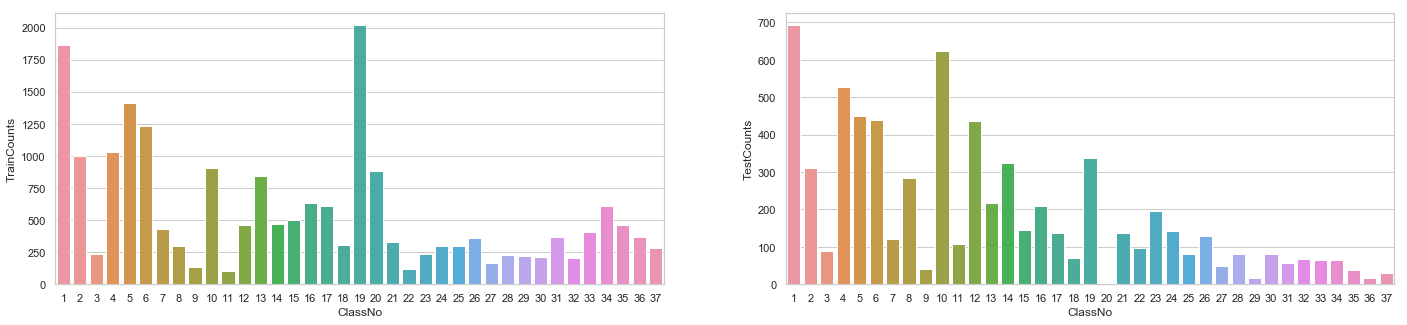

In [0]:
class_counts_train = []
class_counts_test = []
for l in y.columns:
    class_counts_train.append(y_train1[l].sum())
    class_counts_test.append(y_test1[l].sum())
class_distr = pd.DataFrame({'ClassNo':list(range(1,38)),'Class':y.columns,'TrainCounts':class_counts_train,'TestCounts':class_counts_test})
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2)
sns.set(rc={'figure.figsize':(24,5)})
sns.barplot(x="ClassNo", y="TrainCounts", data=class_distr, ax=axs[0])
sns.barplot(x="ClassNo", y="TestCounts", data=class_distr, ax=axs[1])

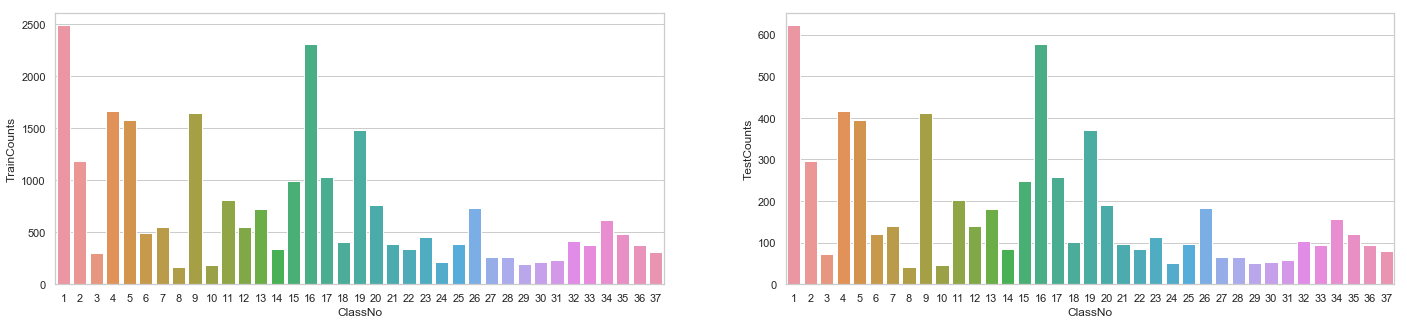

In [0]:
class_counts_train = []
class_counts_test = []
for l in y.columns:
    class_counts_train.append(y_train[l].sum())
    class_counts_test.append(y_test[l].sum())
class_distr = pd.DataFrame({'ClassNo':list(range(1,38)),'Class':y.columns,'TrainCounts':class_counts_train,'TestCounts':class_counts_test})
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2)
sns.set(rc={'figure.figsize':(24,5)})
sns.barplot(x="ClassNo", y="TrainCounts", data=class_distr, ax=axs[0])
sns.barplot(x="ClassNo", y="TestCounts", data=class_distr, ax=axs[1])

In [0]:
pd.DataFrame({
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(np.array(y_train), order=2) for combination in row),
    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(np.array(y_test), order=2) for combination in row)
}).T.fillna(0.0)

In [0]:
class_counts_train = []
class_counts_test = []
for l in y_train.columns:
    class_counts_train.append(y_train[l].sum())
    class_counts_test.append(y_test[l].sum())
class_distr = pd.DataFrame({'ClassNo':list(range(1,38)),'Class':y_train.columns,'TrainCounts':class_counts_train,'TestCounts':class_counts_test})
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2)
sns.set(rc={'figure.figsize':(24,5)})
sns.barplot(x="ClassNo", y="TrainCounts", data=class_distr, ax=axs[0])
sns.barplot(x="ClassNo", y="TestCounts", data=class_distr, ax=axs[1])

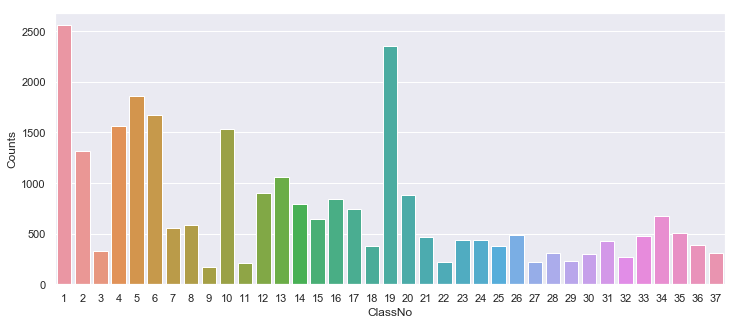

In [0]:
class_counts = []
for l in y.columns:
    class_counts.append(y[l].sum())
class_distr = pd.DataFrame({'ClassNo':list(range(1,38)),'Class':y.columns,'Counts':class_counts})
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=0)
sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(x="ClassNo", y="Counts", data=class_distr)

In [0]:
class_distr 

,ClassNo,Class,Counts
0,1,C-C Bond Formation (Coupling),2555
1,2,C-C Bond Formation (Methylation),1311
2,3,C-C Bond Formation (Olefination),327
3,4,C-N Bond Formation (N-arylation),1562
4,5,C-N Bond Formation (N-methylation),1859
5,6,C-O Bond Formation (Etherification),1671
6,7,Functional Conversion (Hydroxy to methoxy),554
7,8,Functional Introduction (Iodination),583
8,9,Synthesis (Pyrazole),174
9,10,Functional Introduction (Bromination),1535


In [0]:
class_distr

,ClassNo,Class,Counts
0,1,C-C Bond Formation (Coupling),2555
1,2,C-C Bond Formation (Methylation),1311
2,3,C-C Bond Formation (Olefination),327
3,4,C-N Bond Formation (N-arylation),1562
4,5,C-N Bond Formation (N-methylation),1859
5,6,C-O Bond Formation (Etherification),1671
6,7,Functional Conversion (Hydroxy to methoxy),554
7,8,Functional Introduction (Iodination),583
8,9,Synthesis (Pyrazole),174
9,10,Functional Introduction (Bromination),1535


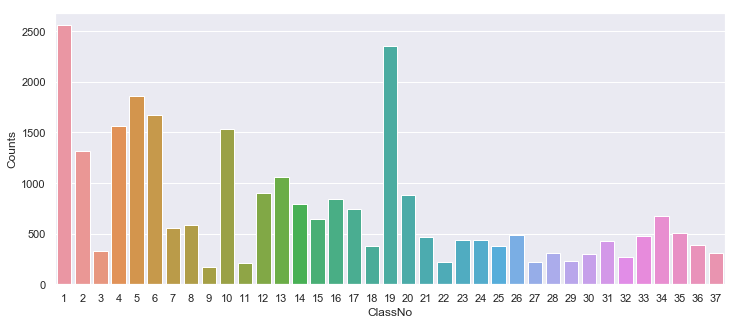

In [0]:
import seaborn as sns
sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")
sns.set(rc={'figure.figsize':(12,5)})
ax = sns.barplot(x="ClassNo", y="Counts", data=class_distr)


In [0]:
''' #Giammy Data
train = pd.read_csv("01-37_random_classes_training_set.csv.gz".format(FINGERPRINT), compression='gzip')
test = pd.read_csv("02-37_random_classes_test_set.csv.gz".format(FINGERPRINT), compression='gzip')
X_train = train.filter(like='Bit', axis=1)
X_test = test.filter(like='Bit', axis=1)
y_train = train[train.columns.drop(list(train.filter(regex='Bit|row')))] 
y_test = test[test.columns.drop(list(test.filter(regex='Bit|row')))] 
'''

#### 异常Metrics检验

In [0]:
##Test BR - LinearSVC
svm = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, 
                C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, 
                class_weight=None, verbose=0, random_state=11, max_iter=1000)
methods = BinaryRelevance(classifier=svm, require_dense=[True,True])
methods.fit(X_train, y_train)
y_pred = methods.predict(X_test)
y_pred = y_pred.todense(order=None, out=None)
import pandas as pd
#y_pred = pd.DataFrame(y_pred, index=y_test.index.values, columns=y_test.columns.values)


E:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
micro_precision = sklearn.metrics.precision_score(y_test, y_pred, average='micro')
weighted_precision = sklearn.metrics.precision_score(y_test, y_pred, average='weighted')
report = sklearn.metrics.classification_report(y_test, y_pred)
print(micro_precision,weighted_precision)
print(report)

In [0]:
'''
#使用Pickle
print("Loading datasets...")

FINGERPRINT = "FCFP4"

import pickle
X = pickle.load(open("{0}_X.pickle".format(FINGERPRINT), 'rb'))
y = pickle.load(open("{0}_y.pickle".format(FINGERPRINT), 'rb'))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)
print("...Complete")
'''

Loading datasets...
...Complete


## Training

In [0]:
def set_problem_transformation(clf, method):
    """
    ====================================================================================
                                  Set Problem Transformation
    ====================================================================================
    Key arguments:
        clf     =  scikit-learn classifier (e.g. RandomForestClassifier())
        method  =  scikit-multilearn problem transformation method among the ones below:
        
                   'BR' = BinaryRelevance()
                   'LP' = LabelPowerset()
                   'CC' = ClassifierChain()
    ====================================================================================
    """
    # define methods
    methods = {'BR' : BinaryRelevance(classifier=clf, require_dense=[True,True]),
               'LP' : LabelPowerset(classifier=clf, require_dense=[True,True]),
               'CC' : ClassifierChain(classifier=clf, require_dense=[True,True])}
    
    # set the problem transformation
    if method in methods.keys():
        pt_clf = methods[method]
        return pt_clf
    else:
        return str(method)+" is not contained among the possible methods (Try to use 'BR', 'LP', or 'CC')"

In [0]:
def metrics_problem_transformation(pt_clf, X_train, y_train, X_test, y_test):
    """
    ====================================================================================
                                  Test Problem Transformation
    ====================================================================================
    Key arguments:
        pt_clf   =  scikit-multilearn problem transformation classifier
        X_train  =  pandas dataframe containing the training set values
        y_train  =  pandas dataframe containing the training set labels
        X_test   =  pandas dataframe containing the test set values
        y_test   =  pandas dataframe containing the test set labels
    ====================================================================================
    """    
    # load modules
    import pandas as pd
    from sklearn.metrics import (accuracy_score, precision_score, f1_score, recall_score, hamming_loss, zero_one_loss)
    
    # train
    print("Fitting the function...")
    pt_clf.fit(X_train, y_train)
    print("...Complete")
    
    # predict and convert
    print("Predicting the entries...")
    y_pred = pt_clf.predict(X_test)
    print("...Complete\n")
    y_pred = y_pred.todense(order=None, out=None)
    y_pred = pd.DataFrame(y_pred, index=y_test.index.values, columns=y_test.columns.values)
    
    # metrics
    accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
    hloss = sklearn.metrics.hamming_loss(y_test, y_pred)
    zero_one_loss = sklearn.metrics.zero_one_loss(y_test, y_pred)
    micro_precision = sklearn.metrics.precision_score(y_test, y_pred, average='micro')
    weighted_precision = sklearn.metrics.precision_score(y_test, y_pred, average='weighted')
    micro_recall = sklearn.metrics.recall_score(y_test, y_pred, average='micro')
    weighted_recall = sklearn.metrics.recall_score(y_test, y_pred, average='weighted')
    macro_f1 = sklearn.metrics.f1_score(y_test, y_pred, average='macro')
    micro_f1 = sklearn.metrics.f1_score(y_test, y_pred, average='micro')
    weighted_f1 = sklearn.metrics.f1_score(y_test, y_pred, average='weighted')
    #report =  sklearn.metrics.classification_report(y_test, y_pred)
    
    # list metrics and round them
    metrics = [accuracy, hloss, zero_one_loss, micro_recall, weighted_recall,
              micro_precision, weighted_precision, macro_f1, micro_f1, weighted_f1]
    rnd_metrics =  [round(x,2) for x in metrics]
    
    # return rnd_metrics
    #print (pt_clf)
    print (rnd_metrics)
   # print ()
    return metrics


In [0]:
print("Defining the classifiers...")
# define rf classifier
rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, 
                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                            max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                            min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=4, 
                            random_state=11, verbose=0, warm_start=False, class_weight=None)

# define svm classifier
svm = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, 
                C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, 
                class_weight=None, verbose=0, random_state=11, max_iter=10000)
print("...Complete")


Defining the classifiers...
...Complete


In [0]:
methods_to_test = ['BR', 'CC', 'LP']
classifiers_to_test = [rf, svm]
error = []
for c in classifiers_to_test:
    for m in methods_to_test:
        try:
            pt_clf = set_problem_transformation(c, m)
            metrics = metrics_problem_transformation(pt_clf, X_train, y_train, X_test, y_test)
            # append metrics into file
            f = open("{0}/{1}-metrics.csv".format(PATH,FINGERPRINT), "a+")
            fr = open("{0}/{1}-metrics.csv".format(PATH,FINGERPRINT), "r")
            if(sum(1 for line in fr)==0):
                f.write("method,classifier,accuracy, hloss, zero_one_loss, micro_recall, weighted_recall, micro_precision, weighted_precision, macro_f1, micro_f1, weighted_f1"+"\n")
            fr.close()
            f.write(','.join([m,str(c).split('(')[0],','.join(map(str, [round(x,2) for x in metrics]))])+"\n")
            f.close()
        except Exception as e:
            print(e)
            #error.append(e)

Fitting the function...
...Complete
Predicting the entries...
...Complete

Fitting the function...
...Complete
Predicting the entries...
...Complete

Fitting the function...
...Complete
Predicting the entries...
...Complete

Fitting the function...
...Complete
Predicting the entries...
...Complete

Fitting the function...


E:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KeyboardInterrupt: 

In [0]:
for e in error:
    print(e)

In [0]:
"{0}/{1}-metrics.csv".format(PATH,FINGERPRINT)

'E:/Google 云端硬盘/2019- Zehao (1)/Top15_Fingerprint/Top15-metrics.csv'